In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplstereonet as mpl
from surface_roughness.roughness import Surface

Loading mesh at X:\20220113_surface_sampling_samples\20220823_beza_direct_tension_bot_1_1.stl
Aligning to best fit...
Calculating areas...
Calculating normals...


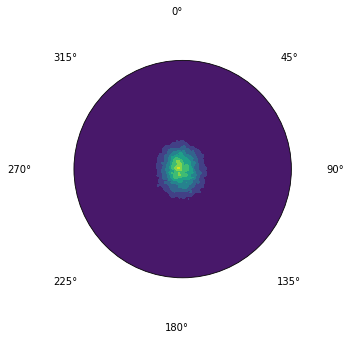

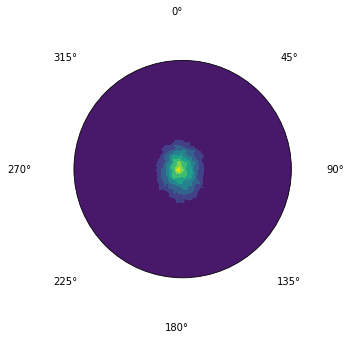

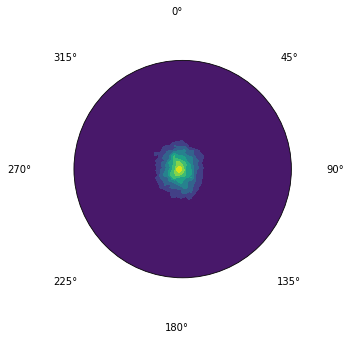

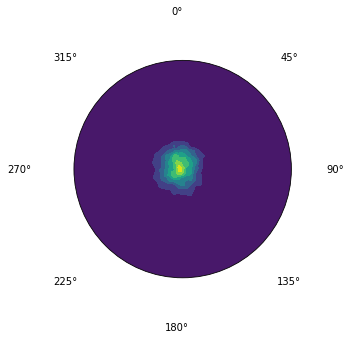

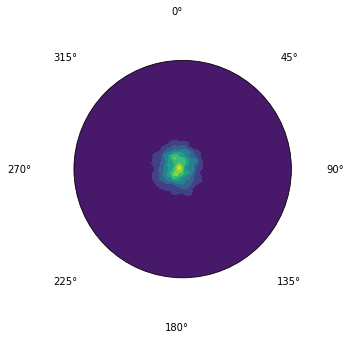

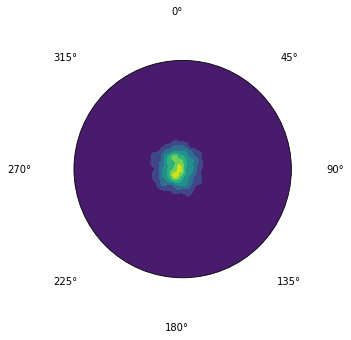

In [15]:
file = r'X:\20220113_surface_sampling_samples\20220823_beza_direct_tension_bot_1_1.stl'

surface = Surface(file)
bounds = surface.bounds()
min_bound = np.min(bounds[1,:2]-bounds[0,:2])
centroid = np.mean(bounds,axis=0)
points = surface.points
tri = surface.triangles
normals = surface.normals
for i in range(6,30,4):

    p_in_circle = (points[:,0]-centroid[0])**2 + (points[:,1]-centroid[1])**2 < (min_bound/i)**2
    selected_surface_idx = np.all(p_in_circle[tri],axis=1)
    x,y,z = normals[selected_surface_idx].T
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='stereonet')
    plunge,bearing = mpl.vector2plunge_bearing(x,y,z)
    ax.density_contourf(plunge,bearing,measurement='lines')
    plt.show()

Loading mesh at example_surface.stl
Aligning to best fit...
Calculating areas...
Calculating normals...


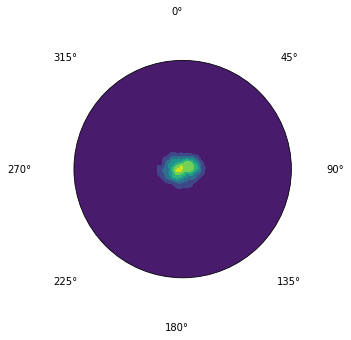

In [5]:
file = 'example_surface.stl'
mesh = Surface(file)
fig = plt.figure()
ax = fig.add_subplot(111,projection='stereonet')
x,y,z = mesh.normals.T

plunge,bearing = mpl.vector2plunge_bearing(x,y,z)
ax.density_contourf(plunge,bearing,measurement='lines')
# ax.line(plunge,bearing,marker='o',color='black')

